# Analisando o bot

Este jupyter-notebook vai auxiliar na análise de detecção de intenções da Taís.

## Instalação

### Configurando jupyter

In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

### Listando versões

In [2]:
import rasa_nlu

print("rasa_nlu: {}".format(rasa_nlu.__version__))

rasa_nlu: 0.13.7


### Treinando o modelo do Rasa NLU

Na celula abaixo todas as intents na pasta `../data/intents/` serão utilizadas para gerar a matrix de confuzão para de avaliação do bot.

Ela irá treinar o modelo e executar a avaliação que pode ser verificada na saída da célula abaixo.

In [3]:
import os

from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config


intents_directory = '../../bot/data/intents/'

intents = {}

for intent_file in os.listdir(intents_directory):
    intent_file_path = os.path.join(intents_directory, intent_file)

    intents[intent_file] = {}

    intent_list = []
    intent_name = None

    with open(intent_file_path) as f:
        lines = f.readlines()

        for line in lines:
            line = line.strip()

            if line.startswith('##'):
                if intent_name is not None:
                    intents[intent_file][intent_name] = intent_list
                intent_name = line.replace('## intent:', '') 
                intent_list = []

            elif line.startswith('- '):
                intent_list.append(line.replace('- ', ''))


# loading the nlu training samples
training_data = load_data(intents_directory)

# trainer to educate our pipeline
trainer = Trainer(config.load("../../bot/nlu_config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/random.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 227 (29 distinct intents)
	- Found intents: 'relationship', 'hobby', 'towel', 'license', 'where_r_u_from', 'star_wars', 'movie', 'me', 'name', 'where_u_liv', 'food', 'joke', 'sad', 'how_am_i', 'bff', 'weather', 'color', 'sign', 'creators', 'genre', 'book', 'sons', 'story', 'playlist', 'languages', 'laugh', 'team', 'religion', 'sport'
	- entity examples: 199 (27 distinct entities)
	- found entities: 'relationship', 'me', 'where', 'name', 'food', 'sad', 'book', 'how', 'religion', 'sport', 'towel', 'license', 'movie', 'joke', 'bff', 'weather', 'color', 'sign', 'creators', 'live', 'genre', 'sons', 'story', 'playlist', 'languages', 'starwars', 'hobby'

INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/lappis.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats:

INFO:tensorflow:Restoring parameters from /work/notebooks/intents/./models/nlu/default/current/intent_classifier_tensorflow_embedding.ckpt
INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/random.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 227 (29 distinct intents)
	- Found intents: 'relationship', 'hobby', 'towel', 'license', 'where_r_u_from', 'star_wars', 'movie', 'me', 'name', 'where_u_liv', 'food', 'joke', 'sad', 'how_am_i', 'bff', 'weather', 'color', 'sign', 'creators', 'genre', 'book', 'sons', 'story', 'playlist', 'languages', 'laugh', 'team', 'religion', 'sport'
	- entity examples: 199 (27 distinct entities)
	- found entities: 'relationship', 'me', 'where', 'name', 'food', 'sad', 'book', 'how', 'religion', 'sport', 'towel', 'license', 'movie', 'joke', 'bff', 'weather', 'color', 'sign', 'creators', 'live', 'genre', 'sons', 'story', 'playlist', 'languages', 'starwars', 'hobby'

INFO:rasa_nlu.training

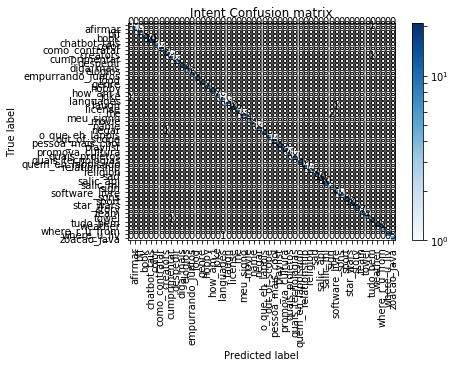

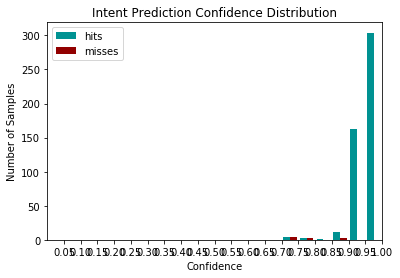

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9942515319600476
INFO:rasa_nlu.evaluate:Precision: 0.9946692748337104
INFO:rasa_nlu.evaluate:Accuracy:  0.9941747572815534
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

         bff       1.00      1.00      1.00        17
        book       1.00      1.00      1.00         5
       color       1.00      1.00      1.00        13
    creators       1.00      0.86      0.92         7
        food       1.00      1.00      1.00        17
       genre       1.00      1.00      1.00        15
       hobby       1.00      1.00      1.00        11
         how       1.00      1.00      1.00        24
        joke       1.00      1.00      1.00         7
   languages       1.00      0.93      0.96        14
     license       1.00      0.86      0.92        14
        live       1.00      1

In [4]:
from rasa_nlu.evaluate import run_evaluation
run_evaluation('../../bot/data/intents/', model_directory)

### Lista de Problemas

O arquivo `erros,json` mostra os erros encontrados após executar o comando `rasa_nlu.evaluate.run_evaluation`.

Normalmente os erros mostrados são textos repetidos nos exemplos de diferrentes `intents`.

Caso o arquivo não seja gerado significa que não foram encontrados erros.

In [5]:
%cat errors.json

{
    "intent_errors": [
        {
            "text": "software livre",
            "intent": "license",
            "intent_prediction": {
                "name": "software_livre",
                "confidence": 0.736741304397583
            }
        },
        {
            "text": "e o c#",
            "intent": "languages",
            "intent_prediction": {
                "name": "",
                "confidence": 0.0
            }
        },
        {
            "text": "quem te fez",
            "intent": "o_que_eh_lappis",
            "intent_prediction": {
                "name": "creators",
                "confidence": 0.7280783653259277
            }
        },
        {
            "text": "qual o seu signo",
            "intent": "meu_signo",
            "intent_prediction": {
                "name": "sign",
                "confidence": 0.7656145095825195
            }
        },
        {
            "text": "signo",
            "intent": "meu_signo",
            "int

### Avaliação do modelo de NLU treinado

Caso queira testar mensagens específicas mande a mensagem na célula seguinte:

In [6]:
pprint(interpreter.parse('O que é um bot?'))

{
  "intent": {
    "name": "languages",
    "confidence": 0.5535852909088135
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "languages",
      "confidence": 0.5535852909088135
    },
    {
      "name": "quem_eh_lappisudo",
      "confidence": 0.35486507415771484
    },
    {
      "name": "quais_tecnologias",
      "confidence": 0.3247317969799042
    },
    {
      "name": "hobby",
      "confidence": 0.3180239796638489
    },
    {
      "name": "empurrando_juntos",
      "confidence": 0.30315032601356506
    },
    {
      "name": "food",
      "confidence": 0.3012806475162506
    },
    {
      "name": "weather",
      "confidence": 0.290009081363678
    },
    {
      "name": "sons",
      "confidence": 0.26835882663726807
    },
    {
      "name": "despedir",
      "confidence": 0.18895845115184784
    },
    {
      "name": "genre",
      "confidence": 0.16960078477859497
    }
  ],
  "text": "O que \u00e9 um bot?"
}
